In [1]:
# Import Required Libraries
# Graph Functions
%matplotlib inline
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import pandas as pd
import os
import time
np.random.seed(2020) 
#import keras
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import sklearn

Saving ge_stock1.txt to ge_stock1.txt
Saving stock_training1.png to stock_training1.png


In [2]:
rand = np.random.seed(2020)
print(rand)

None


In [3]:
display(os.getcwd())
df_ge = pd.read_csv('ge_stock1.txt', engine='python')

df_ge.head()
df_ge.tail()

'/content'

,Date,Open,High,Low,Close,Volume,OpenInt
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


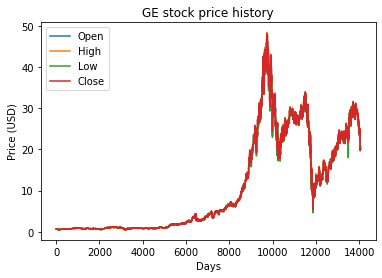

In [4]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Close"]
df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

# Train scalar only on Y
stock_min_max = MinMaxScaler()
stock_min_max.fit_transform(np.reshape(df_train.loc[:, "Close"].values, (-1, 1)))

Train and Test size 11246 2812


array([[0.00338425],
       [0.00338425],
       [0.00321827],
       ...,
       [0.56564471],
       [0.57270398],
       [0.57677987]])

In [6]:
print(x_train.shape)

(11246, 1)


In [7]:
def build_timeseries(mat, y_col_index, TIME_STEPS):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS,dim_1))
    y = np.zeros((dim_0,))
    
    for i in range(dim_0):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y


def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [8]:
TIME_STEPS = 10
# BATCH_SIZE = 32
x_t, y_t = build_timeseries(x_train, 3, TIME_STEPS)
# x_t = trim_dataset(x_t, BATCH_SIZE)
# y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3, TIME_STEPS)
# x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
# y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)
x_val, x_test_t = np.split(x_temp,2)
y_val, y_test_t = np.split(y_temp,2)
print(x_t.shape)

length of time-series i/o (11236, 10, 1) (11236,)
length of time-series i/o (2802, 10, 1) (2802,)
(11236, 10, 1)


In [9]:
# Import functions from Keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
lstm_model = Sequential()
lstm_model.add(LSTM(100,input_shape=(TIME_STEPS,1),return_sequences=True))
lstm_model.add(LSTM(100))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam',
                   metrics=['mae'])

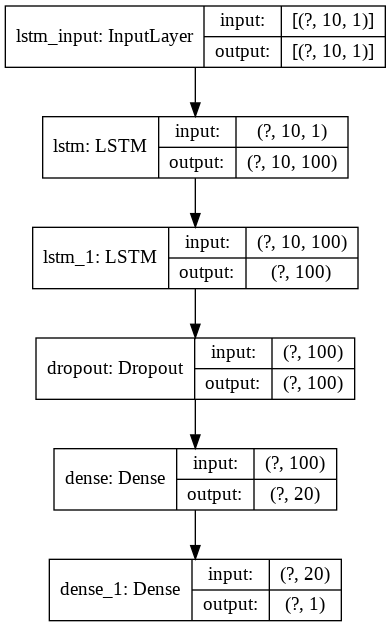

In [10]:

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
plot_model(lstm_model, show_shapes = True)


Epoch 1/10
352/352 [==============================] - 5s 15ms/step - loss: 0.0019 - mae: 0.0185 - val_loss: 3.3374e-04 - val_mae: 0.0145
Epoch 2/10
352/352 [==============================] - 5s 13ms/step - loss: 5.4754e-04 - mae: 0.0119 - val_loss: 4.4808e-04 - val_mae: 0.0170
Epoch 3/10
352/352 [==============================] - 5s 13ms/step - loss: 4.6614e-04 - mae: 0.0114 - val_loss: 5.6151e-04 - val_mae: 0.0199
Epoch 4/10
352/352 [==============================] - 5s 13ms/step - loss: 4.4576e-04 - mae: 0.0117 - val_loss: 2.7447e-04 - val_mae: 0.0125
Epoch 5/10
352/352 [==============================] - 5s 13ms/step - loss: 4.2651e-04 - mae: 0.0116 - val_loss: 2.2220e-04 - val_mae: 0.0110
Epoch 6/10
352/352 [==============================] - 5s 13ms/step - loss: 3.7165e-04 - mae: 0.0113 - val_loss: 0.0012 - val_mae: 0.0308
Epoch 7/10
352/352 [==============================] - 5s 13ms/step - loss: 4.3849e-04 - mae: 0.0125 - val_loss: 4.1312e-04 - val_mae: 0.0154
Epoch 8/10
352/352 [=

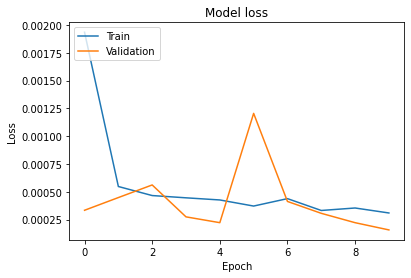

In [11]:
# history = lstm_model.fit(x_t, y_t,
#           batch_size=32, epochs=10, verbose=1,
#           validation_data=(trim_dataset(x_val,BATCH_SIZE), 
#                            trim_dataset(y_val,BATCH_SIZE)))

history = lstm_model.fit(x_t, y_t,
          batch_size=32, epochs=10, verbose=1,
          validation_data=(x_val,y_val))


# history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [12]:
score = lstm_model.evaluate(x_t, y_t, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1] )


352/352 [==============================] - 1s 4ms/step - loss: 1.2527e-04 - mae: 0.0084
Test score: 0.00012526703358162194
Test accuracy: 0.008431228809058666


In [13]:
# predicted = lstm_model.predict(trim_dataset(x_val, BATCH_SIZE))
predicted = lstm_model.predict(x_val)
display(predicted)
display(y_val)
print(predicted.size)
x_val.shape

array([[0.57963395],
       [0.58174103],
       [0.58395386],
       ...,
       [0.33208907],
       [0.33228981],
       [0.33236557]], dtype=float32)

array([0.58812513, 0.59047822, 0.58747383, ..., 0.33189038, 0.32764642,
       0.32836075])

1401


(1401, 10, 1)

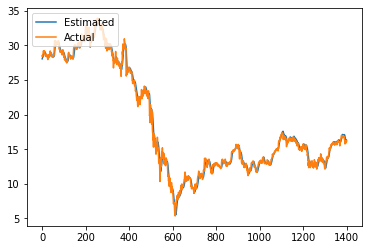

In [14]:
plt.figure()
plt.plot(stock_min_max.inverse_transform(predicted))
# plt.plot(stock_min_max.inverse_transform(np.reshape(trim_dataset(y_val, BATCH_SIZE), (-1,1))))
plt.plot(stock_min_max.inverse_transform(np.reshape(y_val, (-1,1))))
plt.legend(['Estimated', 'Actual'], loc='upper left')

In [15]:
predict_dataset = x_test
display(predict_dataset.shape)
predict_dataset = predict_dataset[2812-TIME_STEPS:,:].reshape(1,-1)
display(predict_dataset.shape)

(2812, 1)

(1, 10)

In [16]:
temp_input = predict_dataset
x_input = predict_dataset

In [17]:
temp_input


array([[0.41916483, 0.4139124 , 0.41097103, 0.40929025, 0.4134922 ,
        0.4132821 , 0.41496288, 0.41307201, 0.41034074, 0.42084561]])

In [18]:
from numpy import array
list_op = []
num_steps= 10
i = 0
days_predict = 365;
while (i<days_predict):
  if (len(temp_input)>10):
    x_input = np.array(temp_input[1:,])
    # print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(-1,1)
    x_input = x_input.reshape((1, 10, 1))
    #print(x_input[0:2])
    yhat = lstm_model.predict(x_input,verbose = 0)
    #print("{} day ouput {}".format(i,yhat))
    #temp_input = temp_input.extend(yhat[0].tolist)
    temp_input = np.append(temp_input,yhat[0])
    display(temp_input)
    temp_input = temp_input[1:,]
    list_op.extend(yhat.tolist())

    i=i+1
  
  
  else:
    x_input = x_input.reshape((1, num_steps, 1))
    yhat = lstm_model.predict(x_input,verbose = 0)
    display(yhat.shape)  
    #temp_input = temp_input.extend(yhat[0].tolist())
    temp_input = np.append(temp_input,yhat[0])
    list_op.extend(yhat.tolist())



    i=i+1



(1, 1)

array([0.41916483, 0.4139124 , 0.41097103, 0.40929025, 0.4134922 ,
       0.4132821 , 0.41496288, 0.41307201, 0.41034074, 0.42084561,
       0.42275316, 0.42456898])

array([0.4139124 , 0.41097103, 0.40929025, 0.4134922 , 0.4132821 ,
       0.41496288, 0.41307201, 0.41034074, 0.42084561, 0.42275316,
       0.42456898, 0.42667961])

array([0.41097103, 0.40929025, 0.4134922 , 0.4132821 , 0.41496288,
       0.41307201, 0.41034074, 0.42084561, 0.42275316, 0.42456898,
       0.42667961, 0.42888632])

array([0.40929025, 0.4134922 , 0.4132821 , 0.41496288, 0.41307201,
       0.41034074, 0.42084561, 0.42275316, 0.42456898, 0.42667961,
       0.42888632, 0.43111166])

array([0.4134922 , 0.4132821 , 0.41496288, 0.41307201, 0.41034074,
       0.42084561, 0.42275316, 0.42456898, 0.42667961, 0.42888632,
       0.43111166, 0.43330011])

array([0.4132821 , 0.41496288, 0.41307201, 0.41034074, 0.42084561,
       0.42275316, 0.42456898, 0.42667961, 0.42888632, 0.43111166,
       0.43330011, 0.43547371])

array([0.41496288, 0.41307201, 0.41034074, 0.42084561, 0.42275316,
       0.42456898, 0.42667961, 0.42888632, 0.43111166, 0.43330011,
       0.43547371, 0.43761531])

array([0.41307201, 0.41034074, 0.42084561, 0.42275316, 0.42456898,
       0.42667961, 0.42888632, 0.43111166, 0.43330011, 0.43547371,
       0.43761531, 0.43974283])

array([0.41034074, 0.42084561, 0.42275316, 0.42456898, 0.42667961,
       0.42888632, 0.43111166, 0.43330011, 0.43547371, 0.43761531,
       0.43974283, 0.44185421])

array([0.42084561, 0.42275316, 0.42456898, 0.42667961, 0.42888632,
       0.43111166, 0.43330011, 0.43547371, 0.43761531, 0.43974283,
       0.44185421, 0.44388014])

array([0.42275316, 0.42456898, 0.42667961, 0.42888632, 0.43111166,
       0.43330011, 0.43547371, 0.43761531, 0.43974283, 0.44185421,
       0.44388014, 0.445894  ])

array([0.42456898, 0.42667961, 0.42888632, 0.43111166, 0.43330011,
       0.43547371, 0.43761531, 0.43974283, 0.44185421, 0.44388014,
       0.445894  , 0.44788364])

array([0.42667961, 0.42888632, 0.43111166, 0.43330011, 0.43547371,
       0.43761531, 0.43974283, 0.44185421, 0.44388014, 0.445894  ,
       0.44788364, 0.44984025])

array([0.42888632, 0.43111166, 0.43330011, 0.43547371, 0.43761531,
       0.43974283, 0.44185421, 0.44388014, 0.445894  , 0.44788364,
       0.44984025, 0.45176652])

array([0.43111166, 0.43330011, 0.43547371, 0.43761531, 0.43974283,
       0.44185421, 0.44388014, 0.445894  , 0.44788364, 0.44984025,
       0.45176652, 0.45366374])

array([0.43330011, 0.43547371, 0.43761531, 0.43974283, 0.44185421,
       0.44388014, 0.445894  , 0.44788364, 0.44984025, 0.45176652,
       0.45366374, 0.45553237])

array([0.43547371, 0.43761531, 0.43974283, 0.44185421, 0.44388014,
       0.445894  , 0.44788364, 0.44984025, 0.45176652, 0.45366374,
       0.45553237, 0.45737275])

array([0.43761531, 0.43974283, 0.44185421, 0.44388014, 0.445894  ,
       0.44788364, 0.44984025, 0.45176652, 0.45366374, 0.45553237,
       0.45737275, 0.45918536])

array([0.43974283, 0.44185421, 0.44388014, 0.445894  , 0.44788364,
       0.44984025, 0.45176652, 0.45366374, 0.45553237, 0.45737275,
       0.45918536, 0.46097055])

array([0.44185421, 0.44388014, 0.445894  , 0.44788364, 0.44984025,
       0.45176652, 0.45366374, 0.45553237, 0.45737275, 0.45918536,
       0.46097055, 0.46272886])

array([0.44388014, 0.445894  , 0.44788364, 0.44984025, 0.45176652,
       0.45366374, 0.45553237, 0.45737275, 0.45918536, 0.46097055,
       0.46272886, 0.46446103])

array([0.445894  , 0.44788364, 0.44984025, 0.45176652, 0.45366374,
       0.45553237, 0.45737275, 0.45918536, 0.46097055, 0.46272886,
       0.46446103, 0.46616724])

array([0.44788364, 0.44984025, 0.45176652, 0.45366374, 0.45553237,
       0.45737275, 0.45918536, 0.46097055, 0.46272886, 0.46446103,
       0.46616724, 0.46784806])

array([0.44984025, 0.45176652, 0.45366374, 0.45553237, 0.45737275,
       0.45918536, 0.46097055, 0.46272886, 0.46446103, 0.46616724,
       0.46784806, 0.46950376])

array([0.45176652, 0.45366374, 0.45553237, 0.45737275, 0.45918536,
       0.46097055, 0.46272886, 0.46446103, 0.46616724, 0.46784806,
       0.46950376, 0.47113496])

array([0.45366374, 0.45553237, 0.45737275, 0.45918536, 0.46097055,
       0.46272886, 0.46446103, 0.46616724, 0.46784806, 0.46950376,
       0.47113496, 0.4727419 ])

array([0.45553237, 0.45737275, 0.45918536, 0.46097055, 0.46272886,
       0.46446103, 0.46616724, 0.46784806, 0.46950376, 0.47113496,
       0.4727419 , 0.47432518])

array([0.45737275, 0.45918536, 0.46097055, 0.46272886, 0.46446103,
       0.46616724, 0.46784806, 0.46950376, 0.47113496, 0.4727419 ,
       0.47432518, 0.47588503])

array([0.45918536, 0.46097055, 0.46272886, 0.46446103, 0.46616724,
       0.46784806, 0.46950376, 0.47113496, 0.4727419 , 0.47432518,
       0.47588503, 0.47742188])

array([0.46097055, 0.46272886, 0.46446103, 0.46616724, 0.46784806,
       0.46950376, 0.47113496, 0.4727419 , 0.47432518, 0.47588503,
       0.47742188, 0.47893611])

array([0.46272886, 0.46446103, 0.46616724, 0.46784806, 0.46950376,
       0.47113496, 0.4727419 , 0.47432518, 0.47588503, 0.47742188,
       0.47893611, 0.48042819])

array([0.46446103, 0.46616724, 0.46784806, 0.46950376, 0.47113496,
       0.4727419 , 0.47432518, 0.47588503, 0.47742188, 0.47893611,
       0.48042819, 0.48189834])

array([0.46616724, 0.46784806, 0.46950376, 0.47113496, 0.4727419 ,
       0.47432518, 0.47588503, 0.47742188, 0.47893611, 0.48042819,
       0.48189834, 0.48334706])

array([0.46784806, 0.46950376, 0.47113496, 0.4727419 , 0.47432518,
       0.47588503, 0.47742188, 0.47893611, 0.48042819, 0.48189834,
       0.48334706, 0.48477459])

array([0.46950376, 0.47113496, 0.4727419 , 0.47432518, 0.47588503,
       0.47742188, 0.47893611, 0.48042819, 0.48189834, 0.48334706,
       0.48477459, 0.48618129])

array([0.47113496, 0.4727419 , 0.47432518, 0.47588503, 0.47742188,
       0.47893611, 0.48042819, 0.48189834, 0.48334706, 0.48477459,
       0.48618129, 0.4875676 ])

array([0.4727419 , 0.47432518, 0.47588503, 0.47742188, 0.47893611,
       0.48042819, 0.48189834, 0.48334706, 0.48477459, 0.48618129,
       0.4875676 , 0.48893377])

array([0.47432518, 0.47588503, 0.47742188, 0.47893611, 0.48042819,
       0.48189834, 0.48334706, 0.48477459, 0.48618129, 0.4875676 ,
       0.48893377, 0.49028009])

array([0.47588503, 0.47742188, 0.47893611, 0.48042819, 0.48189834,
       0.48334706, 0.48477459, 0.48618129, 0.4875676 , 0.48893377,
       0.49028009, 0.49160701])

array([0.47742188, 0.47893611, 0.48042819, 0.48189834, 0.48334706,
       0.48477459, 0.48618129, 0.4875676 , 0.48893377, 0.49028009,
       0.49160701, 0.49291465])

array([0.47893611, 0.48042819, 0.48189834, 0.48334706, 0.48477459,
       0.48618129, 0.4875676 , 0.48893377, 0.49028009, 0.49160701,
       0.49291465, 0.49420348])

array([0.48042819, 0.48189834, 0.48334706, 0.48477459, 0.48618129,
       0.4875676 , 0.48893377, 0.49028009, 0.49160701, 0.49291465,
       0.49420348, 0.4954738 ])

array([0.48189834, 0.48334706, 0.48477459, 0.48618129, 0.4875676 ,
       0.48893377, 0.49028009, 0.49160701, 0.49291465, 0.49420348,
       0.4954738 , 0.49672586])

array([0.48334706, 0.48477459, 0.48618129, 0.4875676 , 0.48893377,
       0.49028009, 0.49160701, 0.49291465, 0.49420348, 0.4954738 ,
       0.49672586, 0.49795982])

array([0.48477459, 0.48618129, 0.4875676 , 0.48893377, 0.49028009,
       0.49160701, 0.49291465, 0.49420348, 0.4954738 , 0.49672586,
       0.49795982, 0.49917623])

array([0.48618129, 0.4875676 , 0.48893377, 0.49028009, 0.49160701,
       0.49291465, 0.49420348, 0.4954738 , 0.49672586, 0.49795982,
       0.49917623, 0.50037521])

array([0.4875676 , 0.48893377, 0.49028009, 0.49160701, 0.49291465,
       0.49420348, 0.4954738 , 0.49672586, 0.49795982, 0.49917623,
       0.50037521, 0.50155699])

array([0.48893377, 0.49028009, 0.49160701, 0.49291465, 0.49420348,
       0.4954738 , 0.49672586, 0.49795982, 0.49917623, 0.50037521,
       0.50155699, 0.50272202])

array([0.49028009, 0.49160701, 0.49291465, 0.49420348, 0.4954738 ,
       0.49672586, 0.49795982, 0.49917623, 0.50037521, 0.50155699,
       0.50272202, 0.50387037])

array([0.49160701, 0.49291465, 0.49420348, 0.4954738 , 0.49672586,
       0.49795982, 0.49917623, 0.50037521, 0.50155699, 0.50272202,
       0.50387037, 0.50500238])

array([0.49291465, 0.49420348, 0.4954738 , 0.49672586, 0.49795982,
       0.49917623, 0.50037521, 0.50155699, 0.50272202, 0.50387037,
       0.50500238, 0.50611842])

array([0.49420348, 0.4954738 , 0.49672586, 0.49795982, 0.49917623,
       0.50037521, 0.50155699, 0.50272202, 0.50387037, 0.50500238,
       0.50611842, 0.50721848])

array([0.4954738 , 0.49672586, 0.49795982, 0.49917623, 0.50037521,
       0.50155699, 0.50272202, 0.50387037, 0.50500238, 0.50611842,
       0.50721848, 0.50830305])

array([0.49672586, 0.49795982, 0.49917623, 0.50037521, 0.50155699,
       0.50272202, 0.50387037, 0.50500238, 0.50611842, 0.50721848,
       0.50830305, 0.50937223])

array([0.49795982, 0.49917623, 0.50037521, 0.50155699, 0.50272202,
       0.50387037, 0.50500238, 0.50611842, 0.50721848, 0.50830305,
       0.50937223, 0.51042634])

array([0.49917623, 0.50037521, 0.50155699, 0.50272202, 0.50387037,
       0.50500238, 0.50611842, 0.50721848, 0.50830305, 0.50937223,
       0.51042634, 0.51146555])

array([0.50037521, 0.50155699, 0.50272202, 0.50387037, 0.50500238,
       0.50611842, 0.50721848, 0.50830305, 0.50937223, 0.51042634,
       0.51146555, 0.51249015])

array([0.50155699, 0.50272202, 0.50387037, 0.50500238, 0.50611842,
       0.50721848, 0.50830305, 0.50937223, 0.51042634, 0.51146555,
       0.51249015, 0.51350033])

array([0.50272202, 0.50387037, 0.50500238, 0.50611842, 0.50721848,
       0.50830305, 0.50937223, 0.51042634, 0.51146555, 0.51249015,
       0.51350033, 0.51449198])

array([0.50387037, 0.50500238, 0.50611842, 0.50721848, 0.50830305,
       0.50937223, 0.51042634, 0.51146555, 0.51249015, 0.51350033,
       0.51449198, 0.51546764])

array([0.50500238, 0.50611842, 0.50721848, 0.50830305, 0.50937223,
       0.51042634, 0.51146555, 0.51249015, 0.51350033, 0.51449198,
       0.51546764, 0.51642847])

array([0.50611842, 0.50721848, 0.50830305, 0.50937223, 0.51042634,
       0.51146555, 0.51249015, 0.51350033, 0.51449198, 0.51546764,
       0.51642847, 0.51737446])

array([0.50721848, 0.50830305, 0.50937223, 0.51042634, 0.51146555,
       0.51249015, 0.51350033, 0.51449198, 0.51546764, 0.51642847,
       0.51737446, 0.51830584])

array([0.50830305, 0.50937223, 0.51042634, 0.51146555, 0.51249015,
       0.51350033, 0.51449198, 0.51546764, 0.51642847, 0.51737446,
       0.51830584, 0.5192228 ])

array([0.50937223, 0.51042634, 0.51146555, 0.51249015, 0.51350033,
       0.51449198, 0.51546764, 0.51642847, 0.51737446, 0.51830584,
       0.5192228 , 0.52012551])

array([0.51042634, 0.51146555, 0.51249015, 0.51350033, 0.51449198,
       0.51546764, 0.51642847, 0.51737446, 0.51830584, 0.5192228 ,
       0.52012551, 0.52101433])

array([0.51146555, 0.51249015, 0.51350033, 0.51449198, 0.51546764,
       0.51642847, 0.51737446, 0.51830584, 0.5192228 , 0.52012551,
       0.52101433, 0.52188933])

array([0.51249015, 0.51350033, 0.51449198, 0.51546764, 0.51642847,
       0.51737446, 0.51830584, 0.5192228 , 0.52012551, 0.52101433,
       0.52188933, 0.52275074])

array([0.51350033, 0.51449198, 0.51546764, 0.51642847, 0.51737446,
       0.51830584, 0.5192228 , 0.52012551, 0.52101433, 0.52188933,
       0.52275074, 0.52359891])

array([0.51449198, 0.51546764, 0.51642847, 0.51737446, 0.51830584,
       0.5192228 , 0.52012551, 0.52101433, 0.52188933, 0.52275074,
       0.52359891, 0.52443397])

array([0.51546764, 0.51642847, 0.51737446, 0.51830584, 0.5192228 ,
       0.52012551, 0.52101433, 0.52188933, 0.52275074, 0.52359891,
       0.52443397, 0.52525616])

array([0.51642847, 0.51737446, 0.51830584, 0.5192228 , 0.52012551,
       0.52101433, 0.52188933, 0.52275074, 0.52359891, 0.52443397,
       0.52525616, 0.52606571])

array([0.51737446, 0.51830584, 0.5192228 , 0.52012551, 0.52101433,
       0.52188933, 0.52275074, 0.52359891, 0.52443397, 0.52525616,
       0.52606571, 0.52686274])

array([0.51830584, 0.5192228 , 0.52012551, 0.52101433, 0.52188933,
       0.52275074, 0.52359891, 0.52443397, 0.52525616, 0.52606571,
       0.52686274, 0.52764761])

array([0.5192228 , 0.52012551, 0.52101433, 0.52188933, 0.52275074,
       0.52359891, 0.52443397, 0.52525616, 0.52606571, 0.52686274,
       0.52764761, 0.52842033])

array([0.52012551, 0.52101433, 0.52188933, 0.52275074, 0.52359891,
       0.52443397, 0.52525616, 0.52606571, 0.52686274, 0.52764761,
       0.52842033, 0.52918124])

array([0.52101433, 0.52188933, 0.52275074, 0.52359891, 0.52443397,
       0.52525616, 0.52606571, 0.52686274, 0.52764761, 0.52842033,
       0.52918124, 0.52993059])

array([0.52188933, 0.52275074, 0.52359891, 0.52443397, 0.52525616,
       0.52606571, 0.52686274, 0.52764761, 0.52842033, 0.52918124,
       0.52993059, 0.53066838])

array([0.52275074, 0.52359891, 0.52443397, 0.52525616, 0.52606571,
       0.52686274, 0.52764761, 0.52842033, 0.52918124, 0.52993059,
       0.53066838, 0.53139484])

array([0.52359891, 0.52443397, 0.52525616, 0.52606571, 0.52686274,
       0.52764761, 0.52842033, 0.52918124, 0.52993059, 0.53066838,
       0.53139484, 0.53211021])

array([0.52443397, 0.52525616, 0.52606571, 0.52686274, 0.52764761,
       0.52842033, 0.52918124, 0.52993059, 0.53066838, 0.53139484,
       0.53211021, 0.53281474])

array([0.52525616, 0.52606571, 0.52686274, 0.52764761, 0.52842033,
       0.52918124, 0.52993059, 0.53066838, 0.53139484, 0.53211021,
       0.53281474, 0.53350842])

array([0.52606571, 0.52686274, 0.52764761, 0.52842033, 0.52918124,
       0.52993059, 0.53066838, 0.53139484, 0.53211021, 0.53281474,
       0.53350842, 0.53419149])

array([0.52686274, 0.52764761, 0.52842033, 0.52918124, 0.52993059,
       0.53066838, 0.53139484, 0.53211021, 0.53281474, 0.53350842,
       0.53419149, 0.53486419])

array([0.52764761, 0.52842033, 0.52918124, 0.52993059, 0.53066838,
       0.53139484, 0.53211021, 0.53281474, 0.53350842, 0.53419149,
       0.53486419, 0.53552663])

array([0.52842033, 0.52918124, 0.52993059, 0.53066838, 0.53139484,
       0.53211021, 0.53281474, 0.53350842, 0.53419149, 0.53486419,
       0.53552663, 0.53617907])

array([0.52918124, 0.52993059, 0.53066838, 0.53139484, 0.53211021,
       0.53281474, 0.53350842, 0.53419149, 0.53486419, 0.53552663,
       0.53617907, 0.53682154])

array([0.52993059, 0.53066838, 0.53139484, 0.53211021, 0.53281474,
       0.53350842, 0.53419149, 0.53486419, 0.53552663, 0.53617907,
       0.53682154, 0.53745425])

array([0.53066838, 0.53139484, 0.53211021, 0.53281474, 0.53350842,
       0.53419149, 0.53486419, 0.53552663, 0.53617907, 0.53682154,
       0.53745425, 0.53807735])

array([0.53139484, 0.53211021, 0.53281474, 0.53350842, 0.53419149,
       0.53486419, 0.53552663, 0.53617907, 0.53682154, 0.53745425,
       0.53807735, 0.53869092])

array([0.53211021, 0.53281474, 0.53350842, 0.53419149, 0.53486419,
       0.53552663, 0.53617907, 0.53682154, 0.53745425, 0.53807735,
       0.53869092, 0.53929532])

array([0.53281474, 0.53350842, 0.53419149, 0.53486419, 0.53552663,
       0.53617907, 0.53682154, 0.53745425, 0.53807735, 0.53869092,
       0.53929532, 0.53989053])

array([0.53350842, 0.53419149, 0.53486419, 0.53552663, 0.53617907,
       0.53682154, 0.53745425, 0.53807735, 0.53869092, 0.53929532,
       0.53989053, 0.54047674])

array([0.53419149, 0.53486419, 0.53552663, 0.53617907, 0.53682154,
       0.53745425, 0.53807735, 0.53869092, 0.53929532, 0.53989053,
       0.54047674, 0.54105401])

array([0.53486419, 0.53552663, 0.53617907, 0.53682154, 0.53745425,
       0.53807735, 0.53869092, 0.53929532, 0.53989053, 0.54047674,
       0.54105401, 0.54162264])

array([0.53552663, 0.53617907, 0.53682154, 0.53745425, 0.53807735,
       0.53869092, 0.53929532, 0.53989053, 0.54047674, 0.54105401,
       0.54162264, 0.54218256])

array([0.53617907, 0.53682154, 0.53745425, 0.53807735, 0.53869092,
       0.53929532, 0.53989053, 0.54047674, 0.54105401, 0.54162264,
       0.54218256, 0.54273415])

array([0.53682154, 0.53745425, 0.53807735, 0.53869092, 0.53929532,
       0.53989053, 0.54047674, 0.54105401, 0.54162264, 0.54218256,
       0.54273415, 0.54327738])

array([0.53745425, 0.53807735, 0.53869092, 0.53929532, 0.53989053,
       0.54047674, 0.54105401, 0.54162264, 0.54218256, 0.54273415,
       0.54327738, 0.54381239])

array([0.53807735, 0.53869092, 0.53929532, 0.53989053, 0.54047674,
       0.54105401, 0.54162264, 0.54218256, 0.54273415, 0.54327738,
       0.54381239, 0.54433936])

array([0.53869092, 0.53929532, 0.53989053, 0.54047674, 0.54105401,
       0.54162264, 0.54218256, 0.54273415, 0.54327738, 0.54381239,
       0.54433936, 0.5448584 ])

array([0.53929532, 0.53989053, 0.54047674, 0.54105401, 0.54162264,
       0.54218256, 0.54273415, 0.54327738, 0.54381239, 0.54433936,
       0.5448584 , 0.54536963])

array([0.53989053, 0.54047674, 0.54105401, 0.54162264, 0.54218256,
       0.54273415, 0.54327738, 0.54381239, 0.54433936, 0.5448584 ,
       0.54536963, 0.54587317])

array([0.54047674, 0.54105401, 0.54162264, 0.54218256, 0.54273415,
       0.54327738, 0.54381239, 0.54433936, 0.5448584 , 0.54536963,
       0.54587317, 0.54636902])

array([0.54105401, 0.54162264, 0.54218256, 0.54273415, 0.54327738,
       0.54381239, 0.54433936, 0.5448584 , 0.54536963, 0.54587317,
       0.54636902, 0.54685748])

array([0.54162264, 0.54218256, 0.54273415, 0.54327738, 0.54381239,
       0.54433936, 0.5448584 , 0.54536963, 0.54587317, 0.54636902,
       0.54685748, 0.54733872])

array([0.54218256, 0.54273415, 0.54327738, 0.54381239, 0.54433936,
       0.5448584 , 0.54536963, 0.54587317, 0.54636902, 0.54685748,
       0.54733872, 0.54781264])

array([0.54273415, 0.54327738, 0.54381239, 0.54433936, 0.5448584 ,
       0.54536963, 0.54587317, 0.54636902, 0.54685748, 0.54733872,
       0.54781264, 0.54827946])

array([0.54327738, 0.54381239, 0.54433936, 0.5448584 , 0.54536963,
       0.54587317, 0.54636902, 0.54685748, 0.54733872, 0.54781264,
       0.54827946, 0.54873931])

array([0.54381239, 0.54433936, 0.5448584 , 0.54536963, 0.54587317,
       0.54636902, 0.54685748, 0.54733872, 0.54781264, 0.54827946,
       0.54873931, 0.54919219])

array([0.54433936, 0.5448584 , 0.54536963, 0.54587317, 0.54636902,
       0.54685748, 0.54733872, 0.54781264, 0.54827946, 0.54873931,
       0.54919219, 0.54963839])

array([0.5448584 , 0.54536963, 0.54587317, 0.54636902, 0.54685748,
       0.54733872, 0.54781264, 0.54827946, 0.54873931, 0.54919219,
       0.54963839, 0.55007786])

array([0.54536963, 0.54587317, 0.54636902, 0.54685748, 0.54733872,
       0.54781264, 0.54827946, 0.54873931, 0.54919219, 0.54963839,
       0.55007786, 0.55051076])

array([0.54587317, 0.54636902, 0.54685748, 0.54733872, 0.54781264,
       0.54827946, 0.54873931, 0.54919219, 0.54963839, 0.55007786,
       0.55051076, 0.55093718])

array([0.54636902, 0.54685748, 0.54733872, 0.54781264, 0.54827946,
       0.54873931, 0.54919219, 0.54963839, 0.55007786, 0.55051076,
       0.55093718, 0.55135727])

array([0.54685748, 0.54733872, 0.54781264, 0.54827946, 0.54873931,
       0.54919219, 0.54963839, 0.55007786, 0.55051076, 0.55093718,
       0.55135727, 0.55177104])

array([0.54733872, 0.54781264, 0.54827946, 0.54873931, 0.54919219,
       0.54963839, 0.55007786, 0.55051076, 0.55093718, 0.55135727,
       0.55177104, 0.55217862])

array([0.54781264, 0.54827946, 0.54873931, 0.54919219, 0.54963839,
       0.55007786, 0.55051076, 0.55093718, 0.55135727, 0.55177104,
       0.55217862, 0.55258012])

array([0.54827946, 0.54873931, 0.54919219, 0.54963839, 0.55007786,
       0.55051076, 0.55093718, 0.55135727, 0.55177104, 0.55217862,
       0.55258012, 0.55297565])

array([0.54873931, 0.54919219, 0.54963839, 0.55007786, 0.55051076,
       0.55093718, 0.55135727, 0.55177104, 0.55217862, 0.55258012,
       0.55297565, 0.55336523])

array([0.54919219, 0.54963839, 0.55007786, 0.55051076, 0.55093718,
       0.55135727, 0.55177104, 0.55217862, 0.55258012, 0.55297565,
       0.55336523, 0.55374908])

array([0.54963839, 0.55007786, 0.55051076, 0.55093718, 0.55135727,
       0.55177104, 0.55217862, 0.55258012, 0.55297565, 0.55336523,
       0.55374908, 0.55412716])

array([0.55007786, 0.55051076, 0.55093718, 0.55135727, 0.55177104,
       0.55217862, 0.55258012, 0.55297565, 0.55336523, 0.55374908,
       0.55412716, 0.55449963])

array([0.55051076, 0.55093718, 0.55135727, 0.55177104, 0.55217862,
       0.55258012, 0.55297565, 0.55336523, 0.55374908, 0.55412716,
       0.55449963, 0.55486655])

array([0.55093718, 0.55135727, 0.55177104, 0.55217862, 0.55258012,
       0.55297565, 0.55336523, 0.55374908, 0.55412716, 0.55449963,
       0.55486655, 0.55522799])

array([0.55135727, 0.55177104, 0.55217862, 0.55258012, 0.55297565,
       0.55336523, 0.55374908, 0.55412716, 0.55449963, 0.55486655,
       0.55522799, 0.55558407])

array([0.55177104, 0.55217862, 0.55258012, 0.55297565, 0.55336523,
       0.55374908, 0.55412716, 0.55449963, 0.55486655, 0.55522799,
       0.55558407, 0.55593479])

array([0.55217862, 0.55258012, 0.55297565, 0.55336523, 0.55374908,
       0.55412716, 0.55449963, 0.55486655, 0.55522799, 0.55558407,
       0.55593479, 0.55628043])

array([0.55258012, 0.55297565, 0.55336523, 0.55374908, 0.55412716,
       0.55449963, 0.55486655, 0.55522799, 0.55558407, 0.55593479,
       0.55628043, 0.55662084])

array([0.55297565, 0.55336523, 0.55374908, 0.55412716, 0.55449963,
       0.55486655, 0.55522799, 0.55558407, 0.55593479, 0.55628043,
       0.55662084, 0.55695623])

array([0.55336523, 0.55374908, 0.55412716, 0.55449963, 0.55486655,
       0.55522799, 0.55558407, 0.55593479, 0.55628043, 0.55662084,
       0.55695623, 0.55728662])

array([0.55374908, 0.55412716, 0.55449963, 0.55486655, 0.55522799,
       0.55558407, 0.55593479, 0.55628043, 0.55662084, 0.55695623,
       0.55728662, 0.55761218])

array([0.55412716, 0.55449963, 0.55486655, 0.55522799, 0.55558407,
       0.55593479, 0.55628043, 0.55662084, 0.55695623, 0.55728662,
       0.55761218, 0.55793279])

array([0.55449963, 0.55486655, 0.55522799, 0.55558407, 0.55593479,
       0.55628043, 0.55662084, 0.55695623, 0.55728662, 0.55761218,
       0.55793279, 0.55824876])

array([0.55486655, 0.55522799, 0.55558407, 0.55593479, 0.55628043,
       0.55662084, 0.55695623, 0.55728662, 0.55761218, 0.55793279,
       0.55824876, 0.55855995])

array([0.55522799, 0.55558407, 0.55593479, 0.55628043, 0.55662084,
       0.55695623, 0.55728662, 0.55761218, 0.55793279, 0.55824876,
       0.55855995, 0.55886662])

array([0.55558407, 0.55593479, 0.55628043, 0.55662084, 0.55695623,
       0.55728662, 0.55761218, 0.55793279, 0.55824876, 0.55855995,
       0.55886662, 0.5591687 ])

array([0.55593479, 0.55628043, 0.55662084, 0.55695623, 0.55728662,
       0.55761218, 0.55793279, 0.55824876, 0.55855995, 0.55886662,
       0.5591687 , 0.5594663 ])

array([0.55628043, 0.55662084, 0.55695623, 0.55728662, 0.55761218,
       0.55793279, 0.55824876, 0.55855995, 0.55886662, 0.5591687 ,
       0.5594663 , 0.5597595 ])

array([0.55662084, 0.55695623, 0.55728662, 0.55761218, 0.55793279,
       0.55824876, 0.55855995, 0.55886662, 0.5591687 , 0.5594663 ,
       0.5597595 , 0.56004834])

array([0.55695623, 0.55728662, 0.55761218, 0.55793279, 0.55824876,
       0.55855995, 0.55886662, 0.5591687 , 0.5594663 , 0.5597595 ,
       0.56004834, 0.56033301])

array([0.55728662, 0.55761218, 0.55793279, 0.55824876, 0.55855995,
       0.55886662, 0.5591687 , 0.5594663 , 0.5597595 , 0.56004834,
       0.56033301, 0.56061339])

array([0.55761218, 0.55793279, 0.55824876, 0.55855995, 0.55886662,
       0.5591687 , 0.5594663 , 0.5597595 , 0.56004834, 0.56033301,
       0.56061339, 0.5608896 ])

array([0.55793279, 0.55824876, 0.55855995, 0.55886662, 0.5591687 ,
       0.5594663 , 0.5597595 , 0.56004834, 0.56033301, 0.56061339,
       0.5608896 , 0.56116176])

array([0.55824876, 0.55855995, 0.55886662, 0.5591687 , 0.5594663 ,
       0.5597595 , 0.56004834, 0.56033301, 0.56061339, 0.5608896 ,
       0.56116176, 0.56142992])

array([0.55855995, 0.55886662, 0.5591687 , 0.5594663 , 0.5597595 ,
       0.56004834, 0.56033301, 0.56061339, 0.5608896 , 0.56116176,
       0.56142992, 0.56169403])

array([0.55886662, 0.5591687 , 0.5594663 , 0.5597595 , 0.56004834,
       0.56033301, 0.56061339, 0.5608896 , 0.56116176, 0.56142992,
       0.56169403, 0.56195438])

array([0.5591687 , 0.5594663 , 0.5597595 , 0.56004834, 0.56033301,
       0.56061339, 0.5608896 , 0.56116176, 0.56142992, 0.56169403,
       0.56195438, 0.5622108 ])

array([0.5594663 , 0.5597595 , 0.56004834, 0.56033301, 0.56061339,
       0.5608896 , 0.56116176, 0.56142992, 0.56169403, 0.56195438,
       0.5622108 , 0.5624634 ])

array([0.5597595 , 0.56004834, 0.56033301, 0.56061339, 0.5608896 ,
       0.56116176, 0.56142992, 0.56169403, 0.56195438, 0.5622108 ,
       0.5624634 , 0.56271243])

array([0.56004834, 0.56033301, 0.56061339, 0.5608896 , 0.56116176,
       0.56142992, 0.56169403, 0.56195438, 0.5622108 , 0.5624634 ,
       0.56271243, 0.56295764])

array([0.56033301, 0.56061339, 0.5608896 , 0.56116176, 0.56142992,
       0.56169403, 0.56195438, 0.5622108 , 0.5624634 , 0.56271243,
       0.56295764, 0.56319928])

array([0.56061339, 0.5608896 , 0.56116176, 0.56142992, 0.56169403,
       0.56195438, 0.5622108 , 0.5624634 , 0.56271243, 0.56295764,
       0.56319928, 0.56343734])

array([0.5608896 , 0.56116176, 0.56142992, 0.56169403, 0.56195438,
       0.5622108 , 0.5624634 , 0.56271243, 0.56295764, 0.56319928,
       0.56343734, 0.56367195])

array([0.56116176, 0.56142992, 0.56169403, 0.56195438, 0.5622108 ,
       0.5624634 , 0.56271243, 0.56295764, 0.56319928, 0.56343734,
       0.56367195, 0.56390297])

array([0.56142992, 0.56169403, 0.56195438, 0.5622108 , 0.5624634 ,
       0.56271243, 0.56295764, 0.56319928, 0.56343734, 0.56367195,
       0.56390297, 0.56413072])

array([0.56169403, 0.56195438, 0.5622108 , 0.5624634 , 0.56271243,
       0.56295764, 0.56319928, 0.56343734, 0.56367195, 0.56390297,
       0.56413072, 0.56435502])

array([0.56195438, 0.5622108 , 0.5624634 , 0.56271243, 0.56295764,
       0.56319928, 0.56343734, 0.56367195, 0.56390297, 0.56413072,
       0.56435502, 0.56457615])

array([0.5622108 , 0.5624634 , 0.56271243, 0.56295764, 0.56319928,
       0.56343734, 0.56367195, 0.56390297, 0.56413072, 0.56435502,
       0.56457615, 0.56479394])

array([0.5624634 , 0.56271243, 0.56295764, 0.56319928, 0.56343734,
       0.56367195, 0.56390297, 0.56413072, 0.56435502, 0.56457615,
       0.56479394, 0.56500852])

array([0.56271243, 0.56295764, 0.56319928, 0.56343734, 0.56367195,
       0.56390297, 0.56413072, 0.56435502, 0.56457615, 0.56479394,
       0.56500852, 0.56522   ])

array([0.56295764, 0.56319928, 0.56343734, 0.56367195, 0.56390297,
       0.56413072, 0.56435502, 0.56457615, 0.56479394, 0.56500852,
       0.56522   , 0.56542838])

array([0.56319928, 0.56343734, 0.56367195, 0.56390297, 0.56413072,
       0.56435502, 0.56457615, 0.56479394, 0.56500852, 0.56522   ,
       0.56542838, 0.56563354])

array([0.56343734, 0.56367195, 0.56390297, 0.56413072, 0.56435502,
       0.56457615, 0.56479394, 0.56500852, 0.56522   , 0.56542838,
       0.56563354, 0.56583583])

array([0.56367195, 0.56390297, 0.56413072, 0.56435502, 0.56457615,
       0.56479394, 0.56500852, 0.56522   , 0.56542838, 0.56563354,
       0.56583583, 0.56603515])

array([0.56390297, 0.56413072, 0.56435502, 0.56457615, 0.56479394,
       0.56500852, 0.56522   , 0.56542838, 0.56563354, 0.56583583,
       0.56603515, 0.56623143])

array([0.56413072, 0.56435502, 0.56457615, 0.56479394, 0.56500852,
       0.56522   , 0.56542838, 0.56563354, 0.56583583, 0.56603515,
       0.56623143, 0.56642497])

array([0.56435502, 0.56457615, 0.56479394, 0.56500852, 0.56522   ,
       0.56542838, 0.56563354, 0.56583583, 0.56603515, 0.56623143,
       0.56642497, 0.56661552])

array([0.56457615, 0.56479394, 0.56500852, 0.56522   , 0.56542838,
       0.56563354, 0.56583583, 0.56603515, 0.56623143, 0.56642497,
       0.56661552, 0.56680334])

array([0.56479394, 0.56500852, 0.56522   , 0.56542838, 0.56563354,
       0.56583583, 0.56603515, 0.56623143, 0.56642497, 0.56661552,
       0.56680334, 0.56698841])

array([0.56500852, 0.56522   , 0.56542838, 0.56563354, 0.56583583,
       0.56603515, 0.56623143, 0.56642497, 0.56661552, 0.56680334,
       0.56698841, 0.5671708 ])

array([0.56522   , 0.56542838, 0.56563354, 0.56583583, 0.56603515,
       0.56623143, 0.56642497, 0.56661552, 0.56680334, 0.56698841,
       0.5671708 , 0.56735045])

array([0.56542838, 0.56563354, 0.56583583, 0.56603515, 0.56623143,
       0.56642497, 0.56661552, 0.56680334, 0.56698841, 0.5671708 ,
       0.56735045, 0.56752741])

array([0.56563354, 0.56583583, 0.56603515, 0.56623143, 0.56642497,
       0.56661552, 0.56680334, 0.56698841, 0.5671708 , 0.56735045,
       0.56752741, 0.56770194])

array([0.56583583, 0.56603515, 0.56623143, 0.56642497, 0.56661552,
       0.56680334, 0.56698841, 0.5671708 , 0.56735045, 0.56752741,
       0.56770194, 0.56787384])

array([0.56603515, 0.56623143, 0.56642497, 0.56661552, 0.56680334,
       0.56698841, 0.5671708 , 0.56735045, 0.56752741, 0.56770194,
       0.56787384, 0.56804317])

array([0.56623143, 0.56642497, 0.56661552, 0.56680334, 0.56698841,
       0.5671708 , 0.56735045, 0.56752741, 0.56770194, 0.56787384,
       0.56804317, 0.56821012])

array([0.56642497, 0.56661552, 0.56680334, 0.56698841, 0.5671708 ,
       0.56735045, 0.56752741, 0.56770194, 0.56787384, 0.56804317,
       0.56821012, 0.56837451])

array([0.56661552, 0.56680334, 0.56698841, 0.5671708 , 0.56735045,
       0.56752741, 0.56770194, 0.56787384, 0.56804317, 0.56821012,
       0.56837451, 0.56853652])

array([0.56680334, 0.56698841, 0.5671708 , 0.56735045, 0.56752741,
       0.56770194, 0.56787384, 0.56804317, 0.56821012, 0.56837451,
       0.56853652, 0.56869626])

array([0.56698841, 0.5671708 , 0.56735045, 0.56752741, 0.56770194,
       0.56787384, 0.56804317, 0.56821012, 0.56837451, 0.56853652,
       0.56869626, 0.5688535 ])

array([0.5671708 , 0.56735045, 0.56752741, 0.56770194, 0.56787384,
       0.56804317, 0.56821012, 0.56837451, 0.56853652, 0.56869626,
       0.5688535 , 0.56900859])

array([0.56735045, 0.56752741, 0.56770194, 0.56787384, 0.56804317,
       0.56821012, 0.56837451, 0.56853652, 0.56869626, 0.5688535 ,
       0.56900859, 0.5691613 ])

array([0.56752741, 0.56770194, 0.56787384, 0.56804317, 0.56821012,
       0.56837451, 0.56853652, 0.56869626, 0.5688535 , 0.56900859,
       0.5691613 , 0.56931186])

array([0.56770194, 0.56787384, 0.56804317, 0.56821012, 0.56837451,
       0.56853652, 0.56869626, 0.5688535 , 0.56900859, 0.5691613 ,
       0.56931186, 0.56946015])

array([0.56787384, 0.56804317, 0.56821012, 0.56837451, 0.56853652,
       0.56869626, 0.5688535 , 0.56900859, 0.5691613 , 0.56931186,
       0.56946015, 0.56960624])

array([0.56804317, 0.56821012, 0.56837451, 0.56853652, 0.56869626,
       0.5688535 , 0.56900859, 0.5691613 , 0.56931186, 0.56946015,
       0.56960624, 0.56975019])

array([0.56821012, 0.56837451, 0.56853652, 0.56869626, 0.5688535 ,
       0.56900859, 0.5691613 , 0.56931186, 0.56946015, 0.56960624,
       0.56975019, 0.56989217])

array([0.56837451, 0.56853652, 0.56869626, 0.5688535 , 0.56900859,
       0.5691613 , 0.56931186, 0.56946015, 0.56960624, 0.56975019,
       0.56989217, 0.570032  ])

array([0.56853652, 0.56869626, 0.5688535 , 0.56900859, 0.5691613 ,
       0.56931186, 0.56946015, 0.56960624, 0.56975019, 0.56989217,
       0.570032  , 0.57016969])

array([0.56869626, 0.5688535 , 0.56900859, 0.5691613 , 0.56931186,
       0.56946015, 0.56960624, 0.56975019, 0.56989217, 0.570032  ,
       0.57016969, 0.57030547])

array([0.5688535 , 0.56900859, 0.5691613 , 0.56931186, 0.56946015,
       0.56960624, 0.56975019, 0.56989217, 0.570032  , 0.57016969,
       0.57030547, 0.57043934])

array([0.56900859, 0.5691613 , 0.56931186, 0.56946015, 0.56960624,
       0.56975019, 0.56989217, 0.570032  , 0.57016969, 0.57030547,
       0.57043934, 0.57057106])

array([0.5691613 , 0.56931186, 0.56946015, 0.56960624, 0.56975019,
       0.56989217, 0.570032  , 0.57016969, 0.57030547, 0.57043934,
       0.57057106, 0.570701  ])

array([0.56931186, 0.56946015, 0.56960624, 0.56975019, 0.56989217,
       0.570032  , 0.57016969, 0.57030547, 0.57043934, 0.57057106,
       0.570701  , 0.57082903])

array([0.56946015, 0.56960624, 0.56975019, 0.56989217, 0.570032  ,
       0.57016969, 0.57030547, 0.57043934, 0.57057106, 0.570701  ,
       0.57082903, 0.57095516])

array([0.56960624, 0.56975019, 0.56989217, 0.570032  , 0.57016969,
       0.57030547, 0.57043934, 0.57057106, 0.570701  , 0.57082903,
       0.57095516, 0.57107937])

array([0.56975019, 0.56989217, 0.570032  , 0.57016969, 0.57030547,
       0.57043934, 0.57057106, 0.570701  , 0.57082903, 0.57095516,
       0.57107937, 0.57120186])

array([0.56989217, 0.570032  , 0.57016969, 0.57030547, 0.57043934,
       0.57057106, 0.570701  , 0.57082903, 0.57095516, 0.57107937,
       0.57120186, 0.57132256])

array([0.570032  , 0.57016969, 0.57030547, 0.57043934, 0.57057106,
       0.570701  , 0.57082903, 0.57095516, 0.57107937, 0.57120186,
       0.57132256, 0.57144153])

array([0.57016969, 0.57030547, 0.57043934, 0.57057106, 0.570701  ,
       0.57082903, 0.57095516, 0.57107937, 0.57120186, 0.57132256,
       0.57144153, 0.57155871])

array([0.57030547, 0.57043934, 0.57057106, 0.570701  , 0.57082903,
       0.57095516, 0.57107937, 0.57120186, 0.57132256, 0.57144153,
       0.57155871, 0.57167417])

array([0.57043934, 0.57057106, 0.570701  , 0.57082903, 0.57095516,
       0.57107937, 0.57120186, 0.57132256, 0.57144153, 0.57155871,
       0.57167417, 0.57178795])

array([0.57057106, 0.570701  , 0.57082903, 0.57095516, 0.57107937,
       0.57120186, 0.57132256, 0.57144153, 0.57155871, 0.57167417,
       0.57178795, 0.57190007])

array([0.570701  , 0.57082903, 0.57095516, 0.57107937, 0.57120186,
       0.57132256, 0.57144153, 0.57155871, 0.57167417, 0.57178795,
       0.57190007, 0.57201052])

array([0.57082903, 0.57095516, 0.57107937, 0.57120186, 0.57132256,
       0.57144153, 0.57155871, 0.57167417, 0.57178795, 0.57190007,
       0.57201052, 0.57211941])

array([0.57095516, 0.57107937, 0.57120186, 0.57132256, 0.57144153,
       0.57155871, 0.57167417, 0.57178795, 0.57190007, 0.57201052,
       0.57211941, 0.57222664])

array([0.57107937, 0.57120186, 0.57132256, 0.57144153, 0.57155871,
       0.57167417, 0.57178795, 0.57190007, 0.57201052, 0.57211941,
       0.57222664, 0.57233238])

array([0.57120186, 0.57132256, 0.57144153, 0.57155871, 0.57167417,
       0.57178795, 0.57190007, 0.57201052, 0.57211941, 0.57222664,
       0.57233238, 0.57243657])

array([0.57132256, 0.57144153, 0.57155871, 0.57167417, 0.57178795,
       0.57190007, 0.57201052, 0.57211941, 0.57222664, 0.57233238,
       0.57243657, 0.57253921])

array([0.57144153, 0.57155871, 0.57167417, 0.57178795, 0.57190007,
       0.57201052, 0.57211941, 0.57222664, 0.57233238, 0.57243657,
       0.57253921, 0.57264042])

array([0.57155871, 0.57167417, 0.57178795, 0.57190007, 0.57201052,
       0.57211941, 0.57222664, 0.57233238, 0.57243657, 0.57253921,
       0.57264042, 0.57274008])

array([0.57167417, 0.57178795, 0.57190007, 0.57201052, 0.57211941,
       0.57222664, 0.57233238, 0.57243657, 0.57253921, 0.57264042,
       0.57274008, 0.57283831])

array([0.57178795, 0.57190007, 0.57201052, 0.57211941, 0.57222664,
       0.57233238, 0.57243657, 0.57253921, 0.57264042, 0.57274008,
       0.57283831, 0.5729351 ])

array([0.57190007, 0.57201052, 0.57211941, 0.57222664, 0.57233238,
       0.57243657, 0.57253921, 0.57264042, 0.57274008, 0.57283831,
       0.5729351 , 0.57303047])

array([0.57201052, 0.57211941, 0.57222664, 0.57233238, 0.57243657,
       0.57253921, 0.57264042, 0.57274008, 0.57283831, 0.5729351 ,
       0.57303047, 0.57312453])

array([0.57211941, 0.57222664, 0.57233238, 0.57243657, 0.57253921,
       0.57264042, 0.57274008, 0.57283831, 0.5729351 , 0.57303047,
       0.57312453, 0.57321715])

array([0.57222664, 0.57233238, 0.57243657, 0.57253921, 0.57264042,
       0.57274008, 0.57283831, 0.5729351 , 0.57303047, 0.57312453,
       0.57321715, 0.57330847])

array([0.57233238, 0.57243657, 0.57253921, 0.57264042, 0.57274008,
       0.57283831, 0.5729351 , 0.57303047, 0.57312453, 0.57321715,
       0.57330847, 0.57339835])

array([0.57243657, 0.57253921, 0.57264042, 0.57274008, 0.57283831,
       0.5729351 , 0.57303047, 0.57312453, 0.57321715, 0.57330847,
       0.57339835, 0.57348704])

array([0.57253921, 0.57264042, 0.57274008, 0.57283831, 0.5729351 ,
       0.57303047, 0.57312453, 0.57321715, 0.57330847, 0.57339835,
       0.57348704, 0.57357436])

array([0.57264042, 0.57274008, 0.57283831, 0.5729351 , 0.57303047,
       0.57312453, 0.57321715, 0.57330847, 0.57339835, 0.57348704,
       0.57357436, 0.57366049])

array([0.57274008, 0.57283831, 0.5729351 , 0.57303047, 0.57312453,
       0.57321715, 0.57330847, 0.57339835, 0.57348704, 0.57357436,
       0.57366049, 0.57374525])

array([0.57283831, 0.5729351 , 0.57303047, 0.57312453, 0.57321715,
       0.57330847, 0.57339835, 0.57348704, 0.57357436, 0.57366049,
       0.57374525, 0.57382894])

array([0.5729351 , 0.57303047, 0.57312453, 0.57321715, 0.57330847,
       0.57339835, 0.57348704, 0.57357436, 0.57366049, 0.57374525,
       0.57382894, 0.57391131])

array([0.57303047, 0.57312453, 0.57321715, 0.57330847, 0.57339835,
       0.57348704, 0.57357436, 0.57366049, 0.57374525, 0.57382894,
       0.57391131, 0.57399249])

array([0.57312453, 0.57321715, 0.57330847, 0.57339835, 0.57348704,
       0.57357436, 0.57366049, 0.57374525, 0.57382894, 0.57391131,
       0.57399249, 0.57407242])

array([0.57321715, 0.57330847, 0.57339835, 0.57348704, 0.57357436,
       0.57366049, 0.57374525, 0.57382894, 0.57391131, 0.57399249,
       0.57407242, 0.57415128])

array([0.57330847, 0.57339835, 0.57348704, 0.57357436, 0.57366049,
       0.57374525, 0.57382894, 0.57391131, 0.57399249, 0.57407242,
       0.57415128, 0.574229  ])

array([0.57339835, 0.57348704, 0.57357436, 0.57366049, 0.57374525,
       0.57382894, 0.57391131, 0.57399249, 0.57407242, 0.57415128,
       0.574229  , 0.57430553])

array([0.57348704, 0.57357436, 0.57366049, 0.57374525, 0.57382894,
       0.57391131, 0.57399249, 0.57407242, 0.57415128, 0.574229  ,
       0.57430553, 0.57438099])

array([0.57357436, 0.57366049, 0.57374525, 0.57382894, 0.57391131,
       0.57399249, 0.57407242, 0.57415128, 0.574229  , 0.57430553,
       0.57438099, 0.57445526])

array([0.57366049, 0.57374525, 0.57382894, 0.57391131, 0.57399249,
       0.57407242, 0.57415128, 0.574229  , 0.57430553, 0.57438099,
       0.57445526, 0.57452857])

array([0.57374525, 0.57382894, 0.57391131, 0.57399249, 0.57407242,
       0.57415128, 0.574229  , 0.57430553, 0.57438099, 0.57445526,
       0.57452857, 0.57460076])

array([0.57382894, 0.57391131, 0.57399249, 0.57407242, 0.57415128,
       0.574229  , 0.57430553, 0.57438099, 0.57445526, 0.57452857,
       0.57460076, 0.57467186])

array([0.57391131, 0.57399249, 0.57407242, 0.57415128, 0.574229  ,
       0.57430553, 0.57438099, 0.57445526, 0.57452857, 0.57460076,
       0.57467186, 0.57474202])

array([0.57399249, 0.57407242, 0.57415128, 0.574229  , 0.57430553,
       0.57438099, 0.57445526, 0.57452857, 0.57460076, 0.57467186,
       0.57474202, 0.5748111 ])

array([0.57407242, 0.57415128, 0.574229  , 0.57430553, 0.57438099,
       0.57445526, 0.57452857, 0.57460076, 0.57467186, 0.57474202,
       0.5748111 , 0.57487917])

array([0.57415128, 0.574229  , 0.57430553, 0.57438099, 0.57445526,
       0.57452857, 0.57460076, 0.57467186, 0.57474202, 0.5748111 ,
       0.57487917, 0.57494622])

array([0.574229  , 0.57430553, 0.57438099, 0.57445526, 0.57452857,
       0.57460076, 0.57467186, 0.57474202, 0.5748111 , 0.57487917,
       0.57494622, 0.57501233])

array([0.57430553, 0.57438099, 0.57445526, 0.57452857, 0.57460076,
       0.57467186, 0.57474202, 0.5748111 , 0.57487917, 0.57494622,
       0.57501233, 0.57507753])

array([0.57438099, 0.57445526, 0.57452857, 0.57460076, 0.57467186,
       0.57474202, 0.5748111 , 0.57487917, 0.57494622, 0.57501233,
       0.57507753, 0.57514167])

array([0.57445526, 0.57452857, 0.57460076, 0.57467186, 0.57474202,
       0.5748111 , 0.57487917, 0.57494622, 0.57501233, 0.57507753,
       0.57514167, 0.57520497])

array([0.57452857, 0.57460076, 0.57467186, 0.57474202, 0.5748111 ,
       0.57487917, 0.57494622, 0.57501233, 0.57507753, 0.57514167,
       0.57520497, 0.57526731])

array([0.57460076, 0.57467186, 0.57474202, 0.5748111 , 0.57487917,
       0.57494622, 0.57501233, 0.57507753, 0.57514167, 0.57520497,
       0.57526731, 0.57532871])

array([0.57467186, 0.57474202, 0.5748111 , 0.57487917, 0.57494622,
       0.57501233, 0.57507753, 0.57514167, 0.57520497, 0.57526731,
       0.57532871, 0.57538933])

array([0.57474202, 0.5748111 , 0.57487917, 0.57494622, 0.57501233,
       0.57507753, 0.57514167, 0.57520497, 0.57526731, 0.57532871,
       0.57538933, 0.57544899])

array([0.5748111 , 0.57487917, 0.57494622, 0.57501233, 0.57507753,
       0.57514167, 0.57520497, 0.57526731, 0.57532871, 0.57538933,
       0.57544899, 0.57550782])

array([0.57487917, 0.57494622, 0.57501233, 0.57507753, 0.57514167,
       0.57520497, 0.57526731, 0.57532871, 0.57538933, 0.57544899,
       0.57550782, 0.5755657 ])

array([0.57494622, 0.57501233, 0.57507753, 0.57514167, 0.57520497,
       0.57526731, 0.57532871, 0.57538933, 0.57544899, 0.57550782,
       0.5755657 , 0.5756228 ])

array([0.57501233, 0.57507753, 0.57514167, 0.57520497, 0.57526731,
       0.57532871, 0.57538933, 0.57544899, 0.57550782, 0.5755657 ,
       0.5756228 , 0.57567906])

array([0.57507753, 0.57514167, 0.57520497, 0.57526731, 0.57532871,
       0.57538933, 0.57544899, 0.57550782, 0.5755657 , 0.5756228 ,
       0.57567906, 0.57573462])

array([0.57514167, 0.57520497, 0.57526731, 0.57532871, 0.57538933,
       0.57544899, 0.57550782, 0.5755657 , 0.5756228 , 0.57567906,
       0.57573462, 0.57578921])

array([0.57520497, 0.57526731, 0.57532871, 0.57538933, 0.57544899,
       0.57550782, 0.5755657 , 0.5756228 , 0.57567906, 0.57573462,
       0.57578921, 0.5758431 ])

array([0.57526731, 0.57532871, 0.57538933, 0.57544899, 0.57550782,
       0.5755657 , 0.5756228 , 0.57567906, 0.57573462, 0.57578921,
       0.5758431 , 0.57589614])

array([0.57532871, 0.57538933, 0.57544899, 0.57550782, 0.5755657 ,
       0.5756228 , 0.57567906, 0.57573462, 0.57578921, 0.5758431 ,
       0.57589614, 0.57594848])

array([0.57538933, 0.57544899, 0.57550782, 0.5755657 , 0.5756228 ,
       0.57567906, 0.57573462, 0.57578921, 0.5758431 , 0.57589614,
       0.57594848, 0.57599998])

array([0.57544899, 0.57550782, 0.5755657 , 0.5756228 , 0.57567906,
       0.57573462, 0.57578921, 0.5758431 , 0.57589614, 0.57594848,
       0.57599998, 0.57605082])

array([0.57550782, 0.5755657 , 0.5756228 , 0.57567906, 0.57573462,
       0.57578921, 0.5758431 , 0.57589614, 0.57594848, 0.57599998,
       0.57605082, 0.57610095])

array([0.5755657 , 0.5756228 , 0.57567906, 0.57573462, 0.57578921,
       0.5758431 , 0.57589614, 0.57594848, 0.57599998, 0.57605082,
       0.57610095, 0.57615018])

array([0.5756228 , 0.57567906, 0.57573462, 0.57578921, 0.5758431 ,
       0.57589614, 0.57594848, 0.57599998, 0.57605082, 0.57610095,
       0.57615018, 0.57619888])

array([0.57567906, 0.57573462, 0.57578921, 0.5758431 , 0.57589614,
       0.57594848, 0.57599998, 0.57605082, 0.57610095, 0.57615018,
       0.57619888, 0.5762468 ])

array([0.57573462, 0.57578921, 0.5758431 , 0.57589614, 0.57594848,
       0.57599998, 0.57605082, 0.57610095, 0.57615018, 0.57619888,
       0.5762468 , 0.57629406])

array([0.57578921, 0.5758431 , 0.57589614, 0.57594848, 0.57599998,
       0.57605082, 0.57610095, 0.57615018, 0.57619888, 0.5762468 ,
       0.57629406, 0.57634056])

array([0.5758431 , 0.57589614, 0.57594848, 0.57599998, 0.57605082,
       0.57610095, 0.57615018, 0.57619888, 0.5762468 , 0.57629406,
       0.57634056, 0.57638639])

array([0.57589614, 0.57594848, 0.57599998, 0.57605082, 0.57610095,
       0.57615018, 0.57619888, 0.5762468 , 0.57629406, 0.57634056,
       0.57638639, 0.57643163])

array([0.57594848, 0.57599998, 0.57605082, 0.57610095, 0.57615018,
       0.57619888, 0.5762468 , 0.57629406, 0.57634056, 0.57638639,
       0.57643163, 0.5764761 ])

array([0.57599998, 0.57605082, 0.57610095, 0.57615018, 0.57619888,
       0.5762468 , 0.57629406, 0.57634056, 0.57638639, 0.57643163,
       0.5764761 , 0.57652009])

array([0.57605082, 0.57610095, 0.57615018, 0.57619888, 0.5762468 ,
       0.57629406, 0.57634056, 0.57638639, 0.57643163, 0.5764761 ,
       0.57652009, 0.5765633 ])

array([0.57610095, 0.57615018, 0.57619888, 0.5762468 , 0.57629406,
       0.57634056, 0.57638639, 0.57643163, 0.5764761 , 0.57652009,
       0.5765633 , 0.57660592])

array([0.57615018, 0.57619888, 0.5762468 , 0.57629406, 0.57634056,
       0.57638639, 0.57643163, 0.5764761 , 0.57652009, 0.5765633 ,
       0.57660592, 0.57664788])

array([0.57619888, 0.5762468 , 0.57629406, 0.57634056, 0.57638639,
       0.57643163, 0.5764761 , 0.57652009, 0.5765633 , 0.57660592,
       0.57664788, 0.57668936])

array([0.5762468 , 0.57629406, 0.57634056, 0.57638639, 0.57643163,
       0.5764761 , 0.57652009, 0.5765633 , 0.57660592, 0.57664788,
       0.57668936, 0.57673013])

array([0.57629406, 0.57634056, 0.57638639, 0.57643163, 0.5764761 ,
       0.57652009, 0.5765633 , 0.57660592, 0.57664788, 0.57668936,
       0.57673013, 0.57677031])

array([0.57634056, 0.57638639, 0.57643163, 0.5764761 , 0.57652009,
       0.5765633 , 0.57660592, 0.57664788, 0.57668936, 0.57673013,
       0.57677031, 0.57681   ])

array([0.57638639, 0.57643163, 0.5764761 , 0.57652009, 0.5765633 ,
       0.57660592, 0.57664788, 0.57668936, 0.57673013, 0.57677031,
       0.57681   , 0.57684898])

array([0.57643163, 0.5764761 , 0.57652009, 0.5765633 , 0.57660592,
       0.57664788, 0.57668936, 0.57673013, 0.57677031, 0.57681   ,
       0.57684898, 0.57688749])

array([0.5764761 , 0.57652009, 0.5765633 , 0.57660592, 0.57664788,
       0.57668936, 0.57673013, 0.57677031, 0.57681   , 0.57684898,
       0.57688749, 0.5769254 ])

array([0.57652009, 0.5765633 , 0.57660592, 0.57664788, 0.57668936,
       0.57673013, 0.57677031, 0.57681   , 0.57684898, 0.57688749,
       0.5769254 , 0.57696277])

array([0.5765633 , 0.57660592, 0.57664788, 0.57668936, 0.57673013,
       0.57677031, 0.57681   , 0.57684898, 0.57688749, 0.5769254 ,
       0.57696277, 0.57699955])

array([0.57660592, 0.57664788, 0.57668936, 0.57673013, 0.57677031,
       0.57681   , 0.57684898, 0.57688749, 0.5769254 , 0.57696277,
       0.57699955, 0.5770359 ])

array([0.57664788, 0.57668936, 0.57673013, 0.57677031, 0.57681   ,
       0.57684898, 0.57688749, 0.5769254 , 0.57696277, 0.57699955,
       0.5770359 , 0.57707161])

array([0.57668936, 0.57673013, 0.57677031, 0.57681   , 0.57684898,
       0.57688749, 0.5769254 , 0.57696277, 0.57699955, 0.5770359 ,
       0.57707161, 0.57710683])

array([0.57673013, 0.57677031, 0.57681   , 0.57684898, 0.57688749,
       0.5769254 , 0.57696277, 0.57699955, 0.5770359 , 0.57707161,
       0.57710683, 0.57714164])

array([0.57677031, 0.57681   , 0.57684898, 0.57688749, 0.5769254 ,
       0.57696277, 0.57699955, 0.5770359 , 0.57707161, 0.57710683,
       0.57714164, 0.57717586])

array([0.57681   , 0.57684898, 0.57688749, 0.5769254 , 0.57696277,
       0.57699955, 0.5770359 , 0.57707161, 0.57710683, 0.57714164,
       0.57717586, 0.57720959])

array([0.57684898, 0.57688749, 0.5769254 , 0.57696277, 0.57699955,
       0.5770359 , 0.57707161, 0.57710683, 0.57714164, 0.57717586,
       0.57720959, 0.57724285])

array([0.57688749, 0.5769254 , 0.57696277, 0.57699955, 0.5770359 ,
       0.57707161, 0.57710683, 0.57714164, 0.57717586, 0.57720959,
       0.57724285, 0.57727563])

array([0.5769254 , 0.57696277, 0.57699955, 0.5770359 , 0.57707161,
       0.57710683, 0.57714164, 0.57717586, 0.57720959, 0.57724285,
       0.57727563, 0.57730788])

array([0.57696277, 0.57699955, 0.5770359 , 0.57707161, 0.57710683,
       0.57714164, 0.57717586, 0.57720959, 0.57724285, 0.57727563,
       0.57730788, 0.57733977])

array([0.57699955, 0.5770359 , 0.57707161, 0.57710683, 0.57714164,
       0.57717586, 0.57720959, 0.57724285, 0.57727563, 0.57730788,
       0.57733977, 0.57737112])

array([0.5770359 , 0.57707161, 0.57710683, 0.57714164, 0.57717586,
       0.57720959, 0.57724285, 0.57727563, 0.57730788, 0.57733977,
       0.57737112, 0.577402  ])

array([0.57707161, 0.57710683, 0.57714164, 0.57717586, 0.57720959,
       0.57724285, 0.57727563, 0.57730788, 0.57733977, 0.57737112,
       0.577402  , 0.57743251])

array([0.57710683, 0.57714164, 0.57717586, 0.57720959, 0.57724285,
       0.57727563, 0.57730788, 0.57733977, 0.57737112, 0.577402  ,
       0.57743251, 0.57746249])

array([0.57714164, 0.57717586, 0.57720959, 0.57724285, 0.57727563,
       0.57730788, 0.57733977, 0.57737112, 0.577402  , 0.57743251,
       0.57746249, 0.57749212])

array([0.57717586, 0.57720959, 0.57724285, 0.57727563, 0.57730788,
       0.57733977, 0.57737112, 0.577402  , 0.57743251, 0.57746249,
       0.57749212, 0.57752126])

array([0.57720959, 0.57724285, 0.57727563, 0.57730788, 0.57733977,
       0.57737112, 0.577402  , 0.57743251, 0.57746249, 0.57749212,
       0.57752126, 0.57754993])

array([0.57724285, 0.57727563, 0.57730788, 0.57733977, 0.57737112,
       0.577402  , 0.57743251, 0.57746249, 0.57749212, 0.57752126,
       0.57754993, 0.57757831])

array([0.57727563, 0.57730788, 0.57733977, 0.57737112, 0.577402  ,
       0.57743251, 0.57746249, 0.57749212, 0.57752126, 0.57754993,
       0.57757831, 0.5776062 ])

array([0.57730788, 0.57733977, 0.57737112, 0.577402  , 0.57743251,
       0.57746249, 0.57749212, 0.57752126, 0.57754993, 0.57757831,
       0.5776062 , 0.57763374])

array([0.57733977, 0.57737112, 0.577402  , 0.57743251, 0.57746249,
       0.57749212, 0.57752126, 0.57754993, 0.57757831, 0.5776062 ,
       0.57763374, 0.5776608 ])

array([0.57737112, 0.577402  , 0.57743251, 0.57746249, 0.57749212,
       0.57752126, 0.57754993, 0.57757831, 0.5776062 , 0.57763374,
       0.5776608 , 0.57768756])

array([0.577402  , 0.57743251, 0.57746249, 0.57749212, 0.57752126,
       0.57754993, 0.57757831, 0.5776062 , 0.57763374, 0.5776608 ,
       0.57768756, 0.57771385])

array([0.57743251, 0.57746249, 0.57749212, 0.57752126, 0.57754993,
       0.57757831, 0.5776062 , 0.57763374, 0.5776608 , 0.57768756,
       0.57771385, 0.57773978])

array([0.57746249, 0.57749212, 0.57752126, 0.57754993, 0.57757831,
       0.5776062 , 0.57763374, 0.5776608 , 0.57768756, 0.57771385,
       0.57773978, 0.57776535])

array([0.57749212, 0.57752126, 0.57754993, 0.57757831, 0.5776062 ,
       0.57763374, 0.5776608 , 0.57768756, 0.57771385, 0.57773978,
       0.57776535, 0.57779062])

array([0.57752126, 0.57754993, 0.57757831, 0.5776062 , 0.57763374,
       0.5776608 , 0.57768756, 0.57771385, 0.57773978, 0.57776535,
       0.57779062, 0.57781541])

array([0.57754993, 0.57757831, 0.5776062 , 0.57763374, 0.5776608 ,
       0.57768756, 0.57771385, 0.57773978, 0.57776535, 0.57779062,
       0.57781541, 0.57783985])

array([0.57757831, 0.5776062 , 0.57763374, 0.5776608 , 0.57768756,
       0.57771385, 0.57773978, 0.57776535, 0.57779062, 0.57781541,
       0.57783985, 0.57786393])

array([0.5776062 , 0.57763374, 0.5776608 , 0.57768756, 0.57771385,
       0.57773978, 0.57776535, 0.57779062, 0.57781541, 0.57783985,
       0.57786393, 0.57788771])

array([0.57763374, 0.5776608 , 0.57768756, 0.57771385, 0.57773978,
       0.57776535, 0.57779062, 0.57781541, 0.57783985, 0.57786393,
       0.57788771, 0.57791114])

array([0.5776608 , 0.57768756, 0.57771385, 0.57773978, 0.57776535,
       0.57779062, 0.57781541, 0.57783985, 0.57786393, 0.57788771,
       0.57791114, 0.57793421])

array([0.57768756, 0.57771385, 0.57773978, 0.57776535, 0.57779062,
       0.57781541, 0.57783985, 0.57786393, 0.57788771, 0.57791114,
       0.57793421, 0.57795697])

array([0.57771385, 0.57773978, 0.57776535, 0.57779062, 0.57781541,
       0.57783985, 0.57786393, 0.57788771, 0.57791114, 0.57793421,
       0.57795697, 0.57797939])

array([0.57773978, 0.57776535, 0.57779062, 0.57781541, 0.57783985,
       0.57786393, 0.57788771, 0.57791114, 0.57793421, 0.57795697,
       0.57797939, 0.5780015 ])

array([0.57776535, 0.57779062, 0.57781541, 0.57783985, 0.57786393,
       0.57788771, 0.57791114, 0.57793421, 0.57795697, 0.57797939,
       0.5780015 , 0.57802325])

array([0.57779062, 0.57781541, 0.57783985, 0.57786393, 0.57788771,
       0.57791114, 0.57793421, 0.57795697, 0.57797939, 0.5780015 ,
       0.57802325, 0.57804471])

array([0.57781541, 0.57783985, 0.57786393, 0.57788771, 0.57791114,
       0.57793421, 0.57795697, 0.57797939, 0.5780015 , 0.57802325,
       0.57804471, 0.57806587])

array([0.57783985, 0.57786393, 0.57788771, 0.57791114, 0.57793421,
       0.57795697, 0.57797939, 0.5780015 , 0.57802325, 0.57804471,
       0.57806587, 0.57808673])

array([0.57786393, 0.57788771, 0.57791114, 0.57793421, 0.57795697,
       0.57797939, 0.5780015 , 0.57802325, 0.57804471, 0.57806587,
       0.57808673, 0.57810724])

array([0.57788771, 0.57791114, 0.57793421, 0.57795697, 0.57797939,
       0.5780015 , 0.57802325, 0.57804471, 0.57806587, 0.57808673,
       0.57810724, 0.5781275 ])

array([0.57791114, 0.57793421, 0.57795697, 0.57797939, 0.5780015 ,
       0.57802325, 0.57804471, 0.57806587, 0.57808673, 0.57810724,
       0.5781275 , 0.57814747])

array([0.57793421, 0.57795697, 0.57797939, 0.5780015 , 0.57802325,
       0.57804471, 0.57806587, 0.57808673, 0.57810724, 0.5781275 ,
       0.57814747, 0.57816714])

array([0.57795697, 0.57797939, 0.5780015 , 0.57802325, 0.57804471,
       0.57806587, 0.57808673, 0.57810724, 0.5781275 , 0.57814747,
       0.57816714, 0.57818639])

array([0.57797939, 0.5780015 , 0.57802325, 0.57804471, 0.57806587,
       0.57808673, 0.57810724, 0.5781275 , 0.57814747, 0.57816714,
       0.57818639, 0.57820559])

array([0.5780015 , 0.57802325, 0.57804471, 0.57806587, 0.57808673,
       0.57810724, 0.5781275 , 0.57814747, 0.57816714, 0.57818639,
       0.57820559, 0.57822442])

array([0.57802325, 0.57804471, 0.57806587, 0.57808673, 0.57810724,
       0.5781275 , 0.57814747, 0.57816714, 0.57818639, 0.57820559,
       0.57822442, 0.5782429 ])

array([0.57804471, 0.57806587, 0.57808673, 0.57810724, 0.5781275 ,
       0.57814747, 0.57816714, 0.57818639, 0.57820559, 0.57822442,
       0.5782429 , 0.57826114])

array([0.57806587, 0.57808673, 0.57810724, 0.5781275 , 0.57814747,
       0.57816714, 0.57818639, 0.57820559, 0.57822442, 0.5782429 ,
       0.57826114, 0.57827914])

array([0.57808673, 0.57810724, 0.5781275 , 0.57814747, 0.57816714,
       0.57818639, 0.57820559, 0.57822442, 0.5782429 , 0.57826114,
       0.57827914, 0.57829696])

array([0.57810724, 0.5781275 , 0.57814747, 0.57816714, 0.57818639,
       0.57820559, 0.57822442, 0.5782429 , 0.57826114, 0.57827914,
       0.57829696, 0.57831442])

array([0.5781275 , 0.57814747, 0.57816714, 0.57818639, 0.57820559,
       0.57822442, 0.5782429 , 0.57826114, 0.57827914, 0.57829696,
       0.57831442, 0.57833159])

array([0.57814747, 0.57816714, 0.57818639, 0.57820559, 0.57822442,
       0.5782429 , 0.57826114, 0.57827914, 0.57829696, 0.57831442,
       0.57833159, 0.57834864])

array([0.57816714, 0.57818639, 0.57820559, 0.57822442, 0.5782429 ,
       0.57826114, 0.57827914, 0.57829696, 0.57831442, 0.57833159,
       0.57834864, 0.57836533])

array([0.57818639, 0.57820559, 0.57822442, 0.5782429 , 0.57826114,
       0.57827914, 0.57829696, 0.57831442, 0.57833159, 0.57834864,
       0.57836533, 0.57838178])

array([0.57820559, 0.57822442, 0.5782429 , 0.57826114, 0.57827914,
       0.57829696, 0.57831442, 0.57833159, 0.57834864, 0.57836533,
       0.57838178, 0.57839811])

array([0.57822442, 0.5782429 , 0.57826114, 0.57827914, 0.57829696,
       0.57831442, 0.57833159, 0.57834864, 0.57836533, 0.57838178,
       0.57839811, 0.57841414])

array([0.5782429 , 0.57826114, 0.57827914, 0.57829696, 0.57831442,
       0.57833159, 0.57834864, 0.57836533, 0.57838178, 0.57839811,
       0.57841414, 0.57842994])

array([0.57826114, 0.57827914, 0.57829696, 0.57831442, 0.57833159,
       0.57834864, 0.57836533, 0.57838178, 0.57839811, 0.57841414,
       0.57842994, 0.57844543])

array([0.57827914, 0.57829696, 0.57831442, 0.57833159, 0.57834864,
       0.57836533, 0.57838178, 0.57839811, 0.57841414, 0.57842994,
       0.57844543, 0.57846081])

array([0.57829696, 0.57831442, 0.57833159, 0.57834864, 0.57836533,
       0.57838178, 0.57839811, 0.57841414, 0.57842994, 0.57844543,
       0.57846081, 0.57847589])

array([0.57831442, 0.57833159, 0.57834864, 0.57836533, 0.57838178,
       0.57839811, 0.57841414, 0.57842994, 0.57844543, 0.57846081,
       0.57847589, 0.57849079])

array([0.57833159, 0.57834864, 0.57836533, 0.57838178, 0.57839811,
       0.57841414, 0.57842994, 0.57844543, 0.57846081, 0.57847589,
       0.57849079, 0.57850552])

array([0.57834864, 0.57836533, 0.57838178, 0.57839811, 0.57841414,
       0.57842994, 0.57844543, 0.57846081, 0.57847589, 0.57849079,
       0.57850552, 0.57851994])

array([0.57836533, 0.57838178, 0.57839811, 0.57841414, 0.57842994,
       0.57844543, 0.57846081, 0.57847589, 0.57849079, 0.57850552,
       0.57851994, 0.57853431])

array([0.57838178, 0.57839811, 0.57841414, 0.57842994, 0.57844543,
       0.57846081, 0.57847589, 0.57849079, 0.57850552, 0.57851994,
       0.57853431, 0.57854819])

array([0.57839811, 0.57841414, 0.57842994, 0.57844543, 0.57846081,
       0.57847589, 0.57849079, 0.57850552, 0.57851994, 0.57853431,
       0.57854819, 0.57856214])

array([0.57841414, 0.57842994, 0.57844543, 0.57846081, 0.57847589,
       0.57849079, 0.57850552, 0.57851994, 0.57853431, 0.57854819,
       0.57856214, 0.57857579])

array([0.57842994, 0.57844543, 0.57846081, 0.57847589, 0.57849079,
       0.57850552, 0.57851994, 0.57853431, 0.57854819, 0.57856214,
       0.57857579, 0.57858926])

array([0.57844543, 0.57846081, 0.57847589, 0.57849079, 0.57850552,
       0.57851994, 0.57853431, 0.57854819, 0.57856214, 0.57857579,
       0.57858926, 0.57860243])

array([0.57846081, 0.57847589, 0.57849079, 0.57850552, 0.57851994,
       0.57853431, 0.57854819, 0.57856214, 0.57857579, 0.57858926,
       0.57860243, 0.57861555])

array([0.57847589, 0.57849079, 0.57850552, 0.57851994, 0.57853431,
       0.57854819, 0.57856214, 0.57857579, 0.57858926, 0.57860243,
       0.57861555, 0.57862842])

array([0.57849079, 0.57850552, 0.57851994, 0.57853431, 0.57854819,
       0.57856214, 0.57857579, 0.57858926, 0.57860243, 0.57861555,
       0.57862842, 0.57864118])

array([0.57850552, 0.57851994, 0.57853431, 0.57854819, 0.57856214,
       0.57857579, 0.57858926, 0.57860243, 0.57861555, 0.57862842,
       0.57864118, 0.57865363])

array([0.57851994, 0.57853431, 0.57854819, 0.57856214, 0.57857579,
       0.57858926, 0.57860243, 0.57861555, 0.57862842, 0.57864118,
       0.57865363, 0.57866591])

array([0.57853431, 0.57854819, 0.57856214, 0.57857579, 0.57858926,
       0.57860243, 0.57861555, 0.57862842, 0.57864118, 0.57865363,
       0.57866591, 0.57867813])

array([0.57854819, 0.57856214, 0.57857579, 0.57858926, 0.57860243,
       0.57861555, 0.57862842, 0.57864118, 0.57865363, 0.57866591,
       0.57867813, 0.57869005])

array([0.57856214, 0.57857579, 0.57858926, 0.57860243, 0.57861555,
       0.57862842, 0.57864118, 0.57865363, 0.57866591, 0.57867813,
       0.57869005, 0.57870185])

array([0.57857579, 0.57858926, 0.57860243, 0.57861555, 0.57862842,
       0.57864118, 0.57865363, 0.57866591, 0.57867813, 0.57869005,
       0.57870185, 0.57871342])

array([0.57858926, 0.57860243, 0.57861555, 0.57862842, 0.57864118,
       0.57865363, 0.57866591, 0.57867813, 0.57869005, 0.57870185,
       0.57871342, 0.57872492])

array([0.57860243, 0.57861555, 0.57862842, 0.57864118, 0.57865363,
       0.57866591, 0.57867813, 0.57869005, 0.57870185, 0.57871342,
       0.57872492, 0.57873619])

array([0.57861555, 0.57862842, 0.57864118, 0.57865363, 0.57866591,
       0.57867813, 0.57869005, 0.57870185, 0.57871342, 0.57872492,
       0.57873619, 0.57874733])

array([0.57862842, 0.57864118, 0.57865363, 0.57866591, 0.57867813,
       0.57869005, 0.57870185, 0.57871342, 0.57872492, 0.57873619,
       0.57874733, 0.57875824])

array([0.57864118, 0.57865363, 0.57866591, 0.57867813, 0.57869005,
       0.57870185, 0.57871342, 0.57872492, 0.57873619, 0.57874733,
       0.57875824, 0.57876909])

In [19]:
type(stock_min_max.inverse_transform(np.reshape(list_op, (-1,1))))
pred_stock = stock_min_max.inverse_transform(np.reshape(list_op, (-1,1)))
input_stock = (stock_min_max.inverse_transform(np.reshape(x_test, (-1,1))))
input_stock = input_stock.tolist()
pred_stock = pred_stock.tolist()
input_stock.extend(pred_stock)
input_stock

[[28.048999999999996],
 [28.003],
 [28.058000000000003],
 [28.073000000000004],
 [28.058000000000003],
 [28.195],
 [27.726999999999997],
 [27.694000000000003],
 [28.090999999999998],
 [28.535],
 [28.451999999999998],
 [28.564000000000004],
 [28.421],
 [28.579000000000004],
 [28.750999999999998],
 [29.064000000000004],
 [29.215999999999998],
 [29.095],
 [29.112],
 [29.224000000000004],
 [29.119],
 [29.163],
 [28.968000000000004],
 [28.63],
 [28.63],
 [28.63],
 [28.405],
 [28.555999999999997],
 [28.604999999999997],
 [28.517],
 [28.67],
 [28.654],
 [28.348000000000003],
 [28.34],
 [28.267],
 [28.099],
 [27.944000000000003],
 [27.995],
 [28.396000000000004],
 [28.613999999999997],
 [28.648000000000007],
 [28.412999999999997],
 [28.316],
 [28.468000000000004],
 [28.654],
 [28.814],
 [28.951999999999998],
 [29.185000000000002],
 [28.968000000000004],
 [28.822],
 [28.974],
 [28.734],
 [28.541999999999998],
 [28.34],
 [28.461],
 [28.405],
 [28.405],
 [28.491999999999994],
 [28.396000000000004

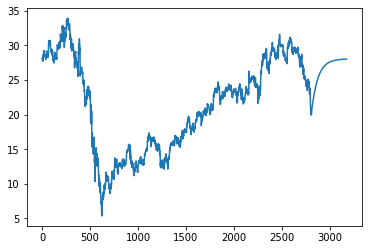

In [20]:
# overall = np.concatenate(np.array(input_stock),np.array(pred_stock))
#overall = dftest1.join(stock_min_max.inverse_transform(np.reshape(list_op, (-1,1))))
plt.plot(input_stock)

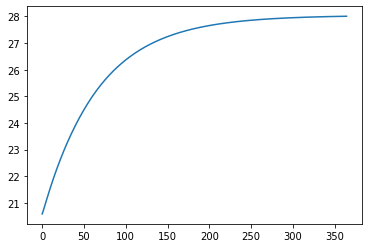

In [21]:
plt.plot(stock_min_max.inverse_transform(np.reshape(list_op, (-1,1))))